<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](mlcourse.ai) – Open Machine Learning Course 
### <center> Author: Tatyana Kudasova, ODS Slack @kudasova
    
## <center> Will you have a success in speed dating?

### Part 1. Dataset and features description

In today’s busy world, finding and dating a romantic partner seems more time consuming than ever. As a result, many people have turned to speed dating as a solution that allows one to meet and interact with a large number of potential partners in a short amount of time. As it turns out, some people actually find a partner during these events, and others don't ever see any of the people they met there. In this project we are exploring what distinguishes those who date after the speed dating ('good, or successful speed daters') from those who don't ('bad speed daters'), and try to predict if a person will be a good or a bad speed dater. So you could try out yourself will the speed dating be helpful for you or not.

The data was gathered from 552 participants in experimental speed dating events from 2002-2004 (total 21 events). Participants were students in graduate and professional schools at Columbia University. They were recruited through a combination of mass e-mail and fliers posted throughout the campus and handed out by research assistants. In order to sign up for a speed dating event, interested students had to register at an online web site on which they reported their names and e-mail addresses and completed a pre-event survey. During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: attractiveness, sincerity, intelligence, fun, ambition, shared interests. The morning after the speed dating event, participants were sent an e-mail requesting that they complete the follow-up online questionnaire. Most of the speed dating participants completed this follow-up questionnaire in order to obtain their matches. Upon receipt of their follow-up questionnaire responses, participants were sent an e-mail informing them of their match results.
Also 3-4 weeks after the speed dating event, participants were asked to fill a survey again. And one answer from this survey we take as a target here - `date_3` - whether a person went to a date with at least one of his/her speed dating matches. All our features will be from pre-event surveys, as our goal is prediction for persons who have never been to such events. For more details, see the speed-dating-data-key.doc for data dictionary and question key. The question key and the data you can find on [Kaggle]: (https://www.kaggle.com/annavictoria/speed-dating-experiment).

### Part 2. Primary data analysis

In [1]:
# importing packages
%matplotlib inline
import pandas as pd
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import recall_score

In [2]:
# importing data
df = pd.read_csv('data/Speed Dating Data.csv', encoding="ISO-8859-1") 
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [3]:
# our data has 8378 rows and 195 columns
df.shape

(8378, 195)

First, in this project we are predicting the success of the speed dating, and we use only the information gathered before speed dating happened, cause the information gathered after the speed dating will leak our prediction. So we delete columns with information gathered after speed dating, except our target variable.

In [4]:
columns_after = df.ix[:, 'satis_2':].columns.values
target = df['date_3']
df = df.drop(columns_after, axis=1)
df['target'] = target
df.shape

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


(8378, 120)

Well, we got far less columns. Second, this dataset contains several rows for each participant (as many, as many partners he/she met during the speed dating). One part of the variables are all the same in those rows for one participant - they are participant-specific, and we are interested in them. Other part is about how the participant rates his/her current speed dating partner, and those we are not of interest for us. Let's look at this:

In [5]:
df[df['iid'] == 1] # participant with her unique iid = 1

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,target
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.00,20.00,20.00,20.00,0.00,5.00,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.00,0.00,0.00,40.00,0.00,0.00,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.00,18.00,19.00,18.00,14.00,12.00,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.00,5.00,15.00,40.00,5.00,5.00,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,1,1.0,0,1,1,1,10,7,NaN,7,5,15.0,1,0.21,0,24.0,3.0,30.00,10.00,20.00,10.00,10.00,20.00,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,1,1.0,0,1,1,1,10,7,NaN,6,6,16.0,0,0.25,0,25.0,2.0,50.00,0.00,30.00,10.00,0.00,10.00,1,7.0,7.0,8.0,8.0,7.0,7.0,7.0,6.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,0,4.0,9.0,7.0,4.0,6.0,4.0,6.0,5.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,1,1.0,0,1,1,1,10,7,NaN,1,7,17.0,0,0.34,0,30.0,2.0,35.00,15.00,25.00,10.00,5.00,10.00,0,3.0,6.0,7.0,5.0,8.0,7.0,2.0

Let's filter all the variables that are not only about the participant, i.e. that have more than one unique value for each participant:

In [6]:
uniques_dict = df[df['iid'] == 1].nunique()
non_uniques = [k for k, v in uniques_dict.items() if v > 1]
df_person = df.drop(non_uniques, axis=1)
df_person.drop_duplicates(subset='iid', keep='first', inplace=True)
df_person.shape

(551, 86)

Now we got far less rows. Also, we need only data were our target variable is not missing, so let's filter that out.

In [7]:
df_person = df_person[pd.notna(df_person['target'])]
df_person.shape

(263, 86)

It is sad, but we have only half of the data. Let's look at what are we left with.

In [8]:
df_person.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,target
0,1,1.0,0,1,1,1,10,7,NaN,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
10,2,2.0,0,3,1,1,10,3,NaN,24.0,law,1.0,NaN,NaN,NaN,2.0,2.0,5.0,Alabama,"35,223","65,929.00",1.0,5.0,1.0,law,NaN,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0,4.0,5.0,45.0,5.0,25.0,20.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,65.0,0.0,10.0,25.0,0.0,0.0,7.0,5.0,10.0,8.0,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
30,4,4.0,0,7,1,1,10,6,NaN,23.0,Law,1.0,NaN,NaN,NaN,2.0,1.0,1.0,Texas,"77,096","37,754.00",1.0,5.0,1.0,lawyer/policy work,1.0,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0,1.0,2.0,20.0,20.0,20.0,20.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,30.0,10.0,15.0,30.0,5.0,10.0,7.0,8.0,9.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
40,5,5.0,0,9,1,1,10,4,NaN,21.0,Law,1.0,NaN,NaN,NaN,2.0,8.0,1.0,Bowdoin College,"94,022","86,340.00",2.0,4.0,1.0,lawyer,1.0,7.0,4.0,7.0,7.0,6.0,8.0,6.0,6.0,8.0,6.0,8.0,6.0,6.0,3.0,7.0,8.0,3.0,7.0,10.0,20.0,5.0,25.0,25.0,10.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,10.0,10.0,20.0,5.0,5.0,6.0,3.0,6.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
100,11,1.0,1,2,1,1,10,7,NaN,27.0,Finance,8.0,NaN,NaN,NaN,2.0,7.0,3.0,Argentina,0,NaN,1.0,5.0,4.0,"Academia, Research, Banking, Life",2.0,8.0,7.0,2.0,6.0,7.0,5.0,5.0,5.0,4.0,9.0,2.0,4.0,8.0,7.0,8.0,5.0,1.0,7.0,3.0,35.0,20.0,20.0,20.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,5.0,20.0,20.0,25.0,5.0,8.0,9.0,7.0,8.0,5.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [9]:
df_person.describe().T

,count,mean,std,min,25%,50%,75%,max
iid,263.0,249.121673,152.782614,1.0,124.0000,232.000,372.5000,552.00
id,263.0,8.076046,5.332630,1.0,4.0000,7.000,11.5000,22.00
gender,263.0,0.444867,0.497899,0.0,0.0000,0.000,1.0000,1.00
idg,263.0,15.471483,10.597338,1.0,7.0000,14.000,22.0000,44.00
condtn,263.0,1.680608,0.467130,1.0,1.0000,2.000,2.0000,2.00
wave,263.0,10.091255,5.736521,1.0,5.0000,9.000,14.0000,21.00
round,263.0,15.125475,4.868837,5.0,10.0000,16.000,19.0000,22.00
position,263.0,7.524715,5.436514,1.0,3.0000,6.000,10.0000,21.00
positin1,193.0,8.217617,5.545672,1.0,4.0000,7.000,12.0000,22.00
age,262.0,26.389313,3.764265,19.0,24.0000,26.000,28.0000,42.00


Here we have one particular row with lot of NA's in it (the particicpant did not care about the questionnaires), so we just delete it.

In [10]:
df_person[df_person['iid']==136]

,iid,id,gender,idg,condtn,wave,round,position,positin1,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,target
1866,136,6.0,0,8,1,6,5,5,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,12.96,14.81,18.52,18.52,18.52,16.67,7.0,9.0,10.0,10.0,10.0,0.0


In [11]:
df_person = df_person[df_person['iid']!=136]
df_person.shape

(262, 86)

Also, we will drop features having more than 20% NAs, those don't seem reliable to me.

In [12]:
na_count = df_person.isna().sum()
too_many_nans = [k for k, v in na_count.items() if v > df_person.shape[0]*0.20]
too_many_nans

['positin1',
 'undergra',
 'mn_sat',
 'tuition',
 'income',
 'expnum',
 'attr4_1',
 'sinc4_1',
 'intel4_1',
 'fun4_1',
 'amb4_1',
 'shar4_1',
 'attr5_1',
 'sinc5_1',
 'intel5_1',
 'fun5_1',
 'amb5_1',
 'attr1_s',
 'sinc1_s',
 'intel1_s',
 'fun1_s',
 'amb1_s',
 'shar1_s',
 'attr3_s',
 'sinc3_s',
 'intel3_s',
 'fun3_s',
 'amb3_s']

In [13]:
df_person = df_person.drop(too_many_nans, axis=1)
df_person.shape

(262, 58)

Now let's look at the features that have not so many NA's and try to fill the NA's there.

In [14]:
na_count = df_person.isna().sum()
na_count[na_count > 0]

zipcode     31
career_c     2
shar1_1      1
attr3_1      1
sinc3_1      1
fun3_1       1
intel3_1     1
amb3_1       1
match_es    36
dtype: int64

As for `zipcode` (zip code of the area where the participant grew up), I think this information is excessive, cause we already have `from` variable (answer to quefeature that might be useful: `foreign` = 1 if student is originally not from USA. 

In [15]:
df_person['foreign'] = (df_person['zipcode'].isna()) | (df_person['zipcode'] == '0')
df_person['foreign'] = df_person['foreign'].astype(int)

Let's check if everything is right and the data is clean.

In [16]:
df_person[['iid', 'from', 'zipcode', 'foreign']].tail()

,iid,from,zipcode,foreign
8202,545,New York City,"10,027",0
8224,546,"Genova, Italy","16,146",0
8268,548,Germany,"50,354",0
8290,549,Italy,136,0
8356,552,France,"78,110",0


No, it is not clean. I will clean it up by hands. It took not that much time, because the dataset is small.

In [17]:
to_foreign = [16, 43, 44, 45, 46, 48, 74, 80, 83, 84, 89, 90, 100, 116, 133, 139, 153, 171, 183, 189, 198, 221, 224, 242, 247, 253, 280, 317, 360, 398,  401, 404, 469, 486, 530, 546, 548, 549, 552]
from_foreign = [187, 220, 244, 278, 322, 328, 331, 333, 336, 462, 526]
foreign_list = []
for index, row in df_person.iterrows():
    if row['iid'] in to_foreign:
        foreign = 1
    elif row['iid'] in from_foreign:
        foreign = 0
    else:
        foreign = row['foreign']
    foreign_list.append(foreign)
df_person['foreign'] = foreign_list

Now we can delete the `zipcode` column.

In [18]:
df_person = df_person.drop('zipcode', axis=1)

Now let's look at the rows with missing `career_c` and try to imply it from `career`.

In [19]:
df_person[['iid', 'career', 'career_c']][df_person['career_c'].isna()]

,iid,career,career_c
0,1,lawyer,NaN
10,2,law,NaN


In [20]:
df_person.loc[:10, 'career_c'] = 1 # 1 stands for 'Law'

As for the rest of columns with NAs, those are numeric, and we will fill NAs there with medians.

In [21]:
num_na = df_person.columns[df_person.isna().any()].tolist()
df_person = df_person.fillna(df_person.median())
na_count = df_person.isna().sum()
na_count[na_count > 0]

Series([], dtype: int64)

Congratulations! We have no more missing values!
Still have one more thing to do. In the surveys the questions about people's attributes were asked differently in different waves of experiment. Waves 6-9: Please rate the importance of the following attributes in a potential date on a scale of 1-10 (1=not at all important, 10=extremely important):
Waves 1-5, 10-21: You have 100 points to distribute among the following attributes -- give more points to those attributes that are more important in a potential date, and fewer points to those attributes that are less important in a potential date.  Total points must equal 100.
So we need to scale the data to avoid this difference.

In [22]:
what_looks_for =['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']
for index, row in df_person.iterrows():
    if any(row[what_looks_for] > 10):
        best = max(row[what_looks_for])
        df_person.loc[index, what_looks_for] = row[what_looks_for]*10/best
df_person[what_looks_for].head()

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
0,7.5,10.000000,10.000000,7.500000,7.5,7.500000
10,10.0,1.111111,5.555556,4.444444,0.0,1.111111
30,10.0,10.000000,10.000000,10.000000,5.0,5.000000
40,8.0,2.000000,10.000000,10.000000,4.0,6.000000
100,10.0,5.714286,5.714286,5.714286,0.0,1.428571


In [23]:
what_opposite_sex_looks_for =['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']
for index, row in df_person.iterrows():
    if any(row[what_opposite_sex_looks_for] > 10):
        best = max(row[what_opposite_sex_looks_for])
        df_person.loc[index, what_opposite_sex_looks_for] = row[what_opposite_sex_looks_for]*10/best
df_person[what_opposite_sex_looks_for].head()

,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1
0,10.0,5.714286,4.285714,5.714286,1.428571,1.428571
10,10.0,0.000000,1.538462,3.846154,0.000000,0.000000
30,10.0,3.333333,5.000000,10.000000,1.666667,3.333333
40,10.0,2.000000,2.000000,4.000000,1.000000,1.000000
100,10.0,2.000000,8.000000,8.000000,10.000000,2.000000


 Finally, we will drop identification number columns and columns related to the speed dating event.

In [24]:
df_person = df_person.drop(['iid', 'id', 'idg', 'wave', 'condtn', 'round', 'position', 'match_es'], axis=1)

Now let's look at our data types.

In [25]:
df_person.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 0 to 8356
Data columns (total 50 columns):
gender      262 non-null int64
age         262 non-null float64
field       262 non-null object
field_cd    262 non-null float64
race        262 non-null float64
imprace     262 non-null float64
imprelig    262 non-null float64
from        262 non-null object
goal        262 non-null float64
date        262 non-null float64
go_out      262 non-null float64
career      262 non-null object
career_c    262 non-null float64
sports      262 non-null float64
tvsports    262 non-null float64
exercise    262 non-null float64
dining      262 non-null float64
museums     262 non-null float64
art         262 non-null float64
hiking      262 non-null float64
gaming      262 non-null float64
clubbing    262 non-null float64
reading     262 non-null float64
tv          262 non-null float64
theater     262 non-null float64
movies      262 non-null float64
concerts    262 non-null float64
music   

Let's make out binary variables binary type.

In [26]:
binary = ['gender', 'foreign', 'target']
df_person[binary] = df_person[binary].astype(bool)

Let's see how many  particiants had at least one date a month after their speed dating.

In [27]:
df_person['target'].value_counts()

False    168
True      94
Name: target, dtype: int64

In [28]:
df_person['target'].value_counts(normalize=True)

False    0.641221
True     0.358779
Name: target, dtype: float64

So 168 out of 262 people (that's about 64%) did not have any dates after speed dating. Let's see if our binary variables: gender and foreign status have a value here.

In [29]:
df_person.groupby(['target'])['gender', 'foreign'].agg([np.mean, np.std, np.min, np.max])

gender                          foreign                       
            mean       std   amin  amax      mean       std   amin  amax
target                                                                  
False   0.446429  0.498608  False  True  0.261905  0.440985  False  True
True    0.446809  0.499828  False  True  0.297872  0.459775  False  True

We see that gender does not affect target variable, but foreign status might. Let's check if this is statistically significant difference using chi-square test of independence of variables in a contingency table.

In [30]:
g, p, dof, expctd = chi2_contingency(pd.crosstab(df_person['foreign'], df_person['target']).values)
p

0.6303390460705545

P-value is 0.63 which is more than 0.05 so we cannot reject our null hypothesis. On such small set of data it is hard to prove statistically feature importance.

Now lets make our categorical data have categorical type.

In [31]:
categories={1: "Black / African American", 
            2: "European/Caucasian-American",
            3: 'Latino/Hispanic American', 
            4: 'Asian/Pacific Islander/Asian-American',
            5: 'Native American', 
            6: 'Other'}
df_person.race = df_person.race.apply(lambda x: categories[x])

In [32]:
categories={1: 'Law',  
            2: 'Math',
            3: 'Social Science, Psychologist',
            4: 'Medical Science, Pharmaceuticals, and Bio Tech',
            5: 'Engineering',
            6: 'English/Creative Writing/ Journalism ',
            7: 'History/Religion/Philosophy', 
            8: 'Business/Econ/Finance',
            9: 'Education, Academia',
            10: 'Biological Sciences/Chemistry/Physics',
            11: 'Social Work',
            12: 'Undergrad/undecided',
            13: 'Political Science/International Affairs', 
            14: 'Film',
            15: 'Fine Arts/Arts Administration',
            16: 'Languages',
            17: 'Architecture',
            18: 'Other'}
df_person.field_cd = df_person.field_cd.apply(lambda x: categories[x])

In [33]:
categories={1: 'Seemed like a fun night out',
            2: 'To meet new people',
            3: 'To get a date',
            4: 'Looking for a serious relationship',
            5: 'To say I did it',
            6: 'Other'}
df_person.goal = df_person.goal.apply(lambda x: categories[x])

In [34]:
categories={1: 'Several times a week',
            2: 'Twice a week',
            3: 'Once a week',
            4: 'Twice a month',
            5: 'Once a month',
            6: 'Several times a year',
            7: 'Almost never'}
df_person.date = df_person.date.apply(lambda x: categories[x])

In [35]:
categories={1: 'Several times a week',
            2: 'Twice a week',
            3: 'Once a week',
            4: 'Twice a month',
            5: 'Once a month',
            6: 'Several times a year',
            7: 'Almost never'}
df_person.go_out = df_person.go_out.apply(lambda x: categories[x])

In [36]:
categories={1: 'Lawyer',
            2: 'Academic/Research',
            3: 'Psychologist',
            4: 'Doctor/Medicine',
            5: 'Engineer',
            6: 'Creative Arts/Entertainment',
            7: 'Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin',
            8: 'Real Estate', 
            9: 'International/Humanitarian Affairs',
            10: 'Undecided',
            11: 'Social Work',
            12: 'Speech Pathology',
            13: 'Politics',
            14: 'Pro sports/Athletics',
            15: 'Other',
            16: 'Journalism',
            17: 'Architecture'}
df_person.career_c = df_person.career_c.apply(lambda x: categories[x])

Relationship between other variables and the target we will visualize and explane the relation in next paragraph!

### Part 3. Primary visual data analysis

First, let's look if age plays role here.

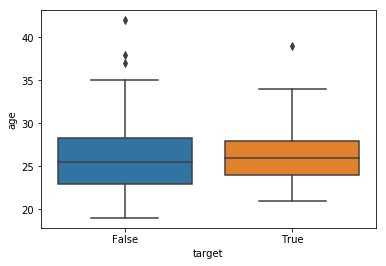

In [37]:
sns.boxplot(x="target", y="age", data=df_person)

Although age of succesful daters is higher on average, the difference is small.
Now let's see if race is important.

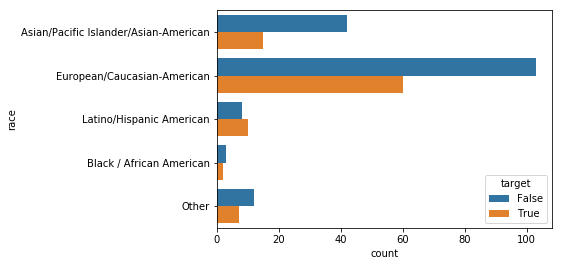

In [38]:
sns.countplot(y='race', hue='target', data=df_person)

Well, compared to all other races, latinos tend to be more successful speed daters. But the latinos subset is too small to use it as a separate feature. Let's look at coded field of study.

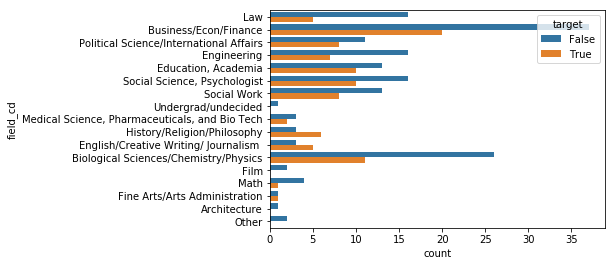

In [39]:
sns.countplot(y='field_cd', hue='target', data=df_person)

In the graph above we se that there are more successful speed daters among those who study history, religion, philosophy, english, creative writing or journalism. But the same as with races, the subset of good speed daters here is very small.

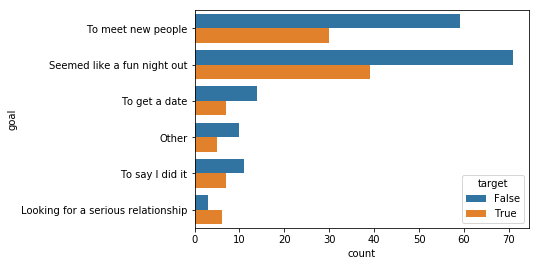

In [40]:
sns.countplot(y='goal', hue='target', data=df_person)

It is not surprising that those who are looking for serious relationship tend to have dates after speed dating. But, sadly, this category is very small so it can't be used as a separate feature.

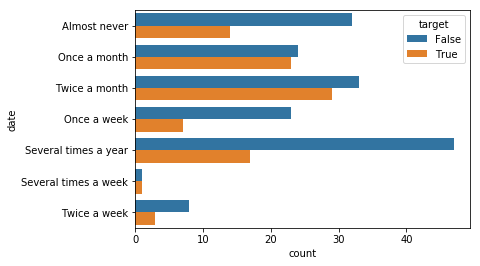

In [41]:
sns.countplot(y='date', hue='target', data=df_person)

On the graph above and on the graph below I don't see any differense between the distribution of good and bad speed daters.

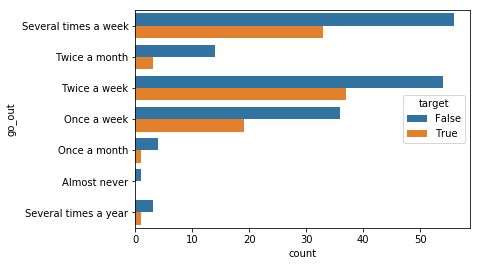

In [42]:
sns.countplot(y='go_out', hue='target', data=df_person)

Does carrier influence speed dater's success?

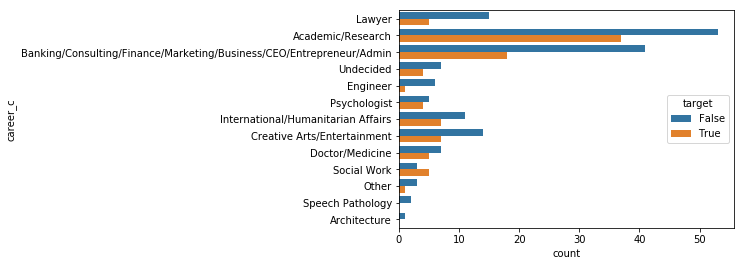

In [43]:
sns.countplot(y='career_c', hue='target', data=df_person)

Surprisingly or not, social workers tend to be the best speed daters. But again, this group of participants is too small.
Do people's hobby affect their speed dating behavior?

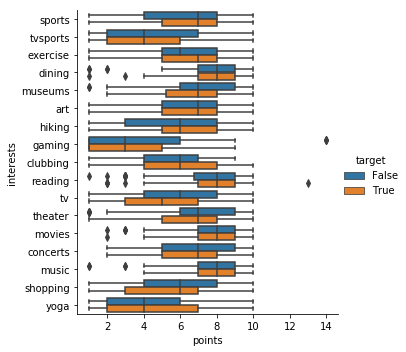

In [44]:
interests = ['target', 
             'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']
df_long = pd.melt(df_person[interests], "target", var_name="interests", value_name="points")
sns.catplot(y="interests", hue="target", x="points", data=df_long, kind="box")

For most hobbies, it does not. But if you enjoy watching tv, you tend to be worse speed dater, and if you enjoy exercise - you possibly become a better speed dater.
Now let's examine `exphappy` feature - answer to the question: "Overall, on a scale of 1-10, how happy do you expect to be with the people you meet during the speed-dating event?"

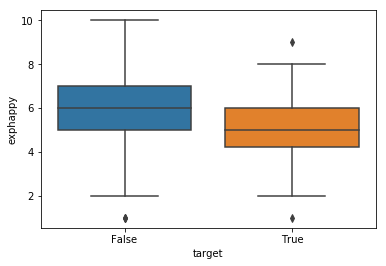

In [45]:
sns.boxplot(x="target", y="exphappy", data=df_person)

It is interesting that good speed daters expect to be less happy than bad speed daters. So the less optimistic you are about speed dating, the better! 
What about race importance variable?

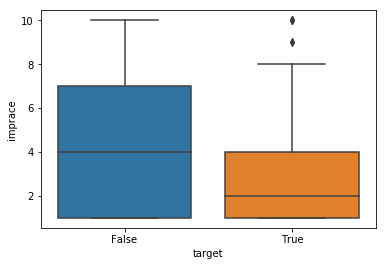

In [46]:
sns.boxplot(x="target", y="imprace",  data=df_person)

For good speed daters race tends to be less important than for bad speed daters. As for religion importance (see below), it does not seem to make any difference.

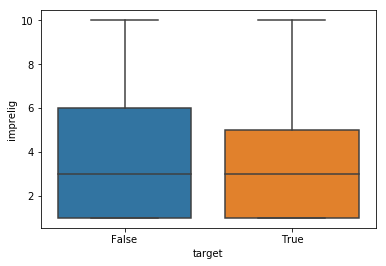

In [47]:
sns.boxplot(x="target", y="imprelig", data=df_person)

As for the attributes that participant is looking for, there is some difference there. Bad speed daters tend to look for more attractiveness, sincerety, intelligence, ambitiousness, shared interests. For good speed daters, fun is more important.

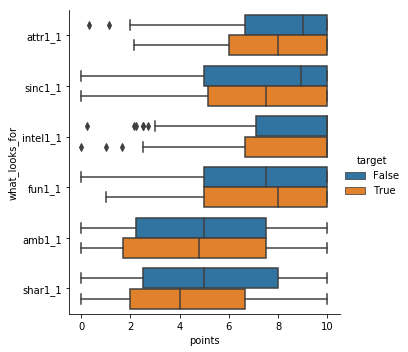

In [48]:
what_looks_for = ['target', 
                  'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']
df_long = pd.melt(df_person[what_looks_for], "target", var_name="what_looks_for", value_name="points")
sns.catplot(y="what_looks_for", hue="target", x="points", data=df_long, kind="box")

There is also difference in the attributes that the participant thinks the opposite sex looks for in a date. Bad speed daters tend to expect that attractiveness, sincerety, intelligence, fun and shared interests to be more important to opposite sex. Good speed daters bet on ambitiousness.

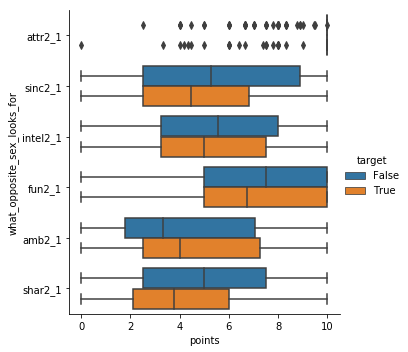

In [49]:
what_opposite_sex_looks_for = ['target', 
                  'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']
df_long = pd.melt(df_person[what_opposite_sex_looks_for], "target", var_name="what_opposite_sex_looks_for", value_name="points")
sns.catplot(y="what_opposite_sex_looks_for", hue="target", x="points", data=df_long, kind="box")

It is interesting that the participants' self-esteem for the same attributes is not important at all!

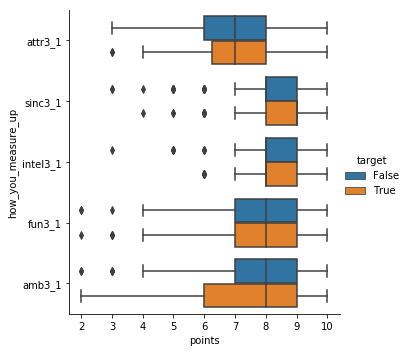

In [50]:
how_you_measure_up = ['target', 
                  'attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']
df_long = pd.melt(df_person[how_you_measure_up], "target", var_name="how_you_measure_up", value_name="points")
sns.catplot(y="how_you_measure_up", hue="target", x="points", data=df_long, kind="box")

Let's construct a new dataframe wiith the features that we've found might influence target and then see if those are correlated.

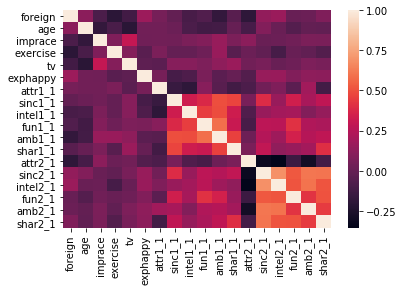

In [51]:
binary_cols = ['foreign']
numeric_cols = ['age', 'imprace', 'exercise', 'tv', 'exphappy', 
                'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1',
                'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']
df_full = pd.concat([df_person[binary_cols], df_person[numeric_cols]], axis=1)
target = df_person['target']
sns.heatmap(df_full.corr())

Well, we see that most of person's attributes correlate with each other, but not much enough to delete them.

### Part 4. Patterns, insights, pecularities of data

The dataset is really small, that's why it was very important that we cleaned our data and examined it very carefully. We need to reduce the number of features in order not to overfit our model. As shown in this [paper](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/1472-6947-12-8#CR31_460), for correlated features it is better to have $\sqrt N$ features were $N$ is sample size. We've found features that might affect the target variable: foreign status, age, race importance, tv loving, exercise loving, happiness expectation, attributes the participant looks for in his dates (6 total), attributes the participant thinks opposite sex looks for in his dates (6 total) - 18 features. 

### Part 5. Metrics Selection

In this project we are dealing with a classification problem with two not that much imbalanced classes. If we predict for a person that he is a bad speed dater in the case where he is actually a good speed dater - that's false negative -  it is more hurtful to us. So to minimize false negatives is more important for us, that's why we choose the recall metrics.

### Part 6. Model Selection

In the case of small dataset there is a huge chance of both underfitting and overfitting. To avoid overfitting, it is recommended to use a simple model with low number of hyperparameters and to reduce number of features. To avoid underfitting, the model should be not too simple. That's why we are choosing the SVM classifier.

### Part 7. Data preprocessing

Here we scale our numeric features with StandardScaler in order for SVC to work properly.

In [52]:
scaler = StandardScaler()
df_full[numeric_cols] = scaler.fit_transform(df_full[numeric_cols])
df_full.head()

,foreign,age,imprace,exercise,tv,exphappy,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1
0,False,-1.434444,-0.655172,0.737877,1.393014,-1.49701,-0.201362,0.911383,0.705264,0.162372,0.845455,0.794015,0.456566,0.172070,-0.402224,-0.422443,-0.985004,-1.163684
10,False,-0.635950,-0.655172,0.310169,-1.766897,-0.89267,0.847133,-1.960426,-1.092356,-0.963572,-1.490145,-1.266462,0.456566,-1.582884,-1.332823,-1.088932,-1.436590,-1.669520
30,False,-0.902115,-0.995083,-0.117538,0.603036,-2.70569,0.847133,0.911383,0.705264,1.083599,0.066922,-0.012259,0.456566,-0.559161,-0.160269,1.106562,-0.909740,-0.489236
40,False,-1.434444,1.384294,0.310169,0.998025,0.92035,0.008337,-1.673245,0.705264,1.083599,-0.244492,0.310251,0.456566,-0.968650,-1.176482,-1.034045,-1.120480,-1.315435
100,True,0.162543,1.044383,-1.828367,-1.371908,0.92035,0.847133,-0.473240,-1.028156,-0.495647,-1.490145,-1.164078,0.456566,-0.968650,0.855945,0.393026,1.724510,-0.961349


###  Part 8. Cross-validation and adjustment of model hyperparameters
Before doing cross-validation, we will make a test sample to test our final model. We assume that our data is time-independent, and do a stratified random split with 10% of the data.

In [53]:
df_full.shape, target.shape

((262, 18), (262,))

In [54]:
X_train, X_test, y_train, y_test = train_test_split(df_full, 
                                                    target, test_size=0.1, random_state=17, stratify=target.values)
X_train.shape, X_test.shape

((235, 18), (27, 18))

For cross-validation, as our dataset is small and classes are imbalanced, we are using stratified 10-fold split.

In [55]:
cv = StratifiedKFold(n_splits=10, random_state=17)

We choose SVM classifier with balanced weights. Our scoring metrics is recall. We are tuning the regularization parameter `C` and the `kernel` type.

In [56]:
clf = SVC(class_weight='balanced', gamma='scale', random_state=17)
params = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ('linear', 'poly', 'rbf', 'sigmoid')
}
gscv = GridSearchCV(clf, params, scoring='recall', cv=cv)
gscv.fit(X_train, y_train)
gscv.best_params_

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 0.01, 'kernel': 'linear'}

Our best parameters are: linear kernel with C = 0.01. Now let's make one more cross-validation with closer range of the parameter `C`.

In [57]:
clf = SVC(kernel='linear', class_weight='balanced', gamma='scale', random_state=17)
params = {
    'C': [0.005, 0.01, 0.02]
}
gscv = GridSearchCV(clf, params, scoring='recall', cv=cv)
gscv.fit(X_train, y_train)
gscv.best_params_

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 0.01}

Still C = 0.01 is the best, so we use it to train the whole train dataset.

In [58]:
clf = SVC(C=0.01, kernel='linear', class_weight='balanced', gamma='scale', random_state=17)
clf.fit(X_train, y_train)

SVC(C=0.01, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
  max_iter=-1, probability=False, random_state=17, shrinking=True,
  tol=0.001, verbose=False)

### Part 9. Creation of new features and description of this process

In part 7 we created a new feature - foreign status. Let's see if it is important for our model.

In [59]:
clf.coef_, X_train.columns.values

(array([[ 0.05132056,  0.04319557, -0.2964616 ,  0.03212229, -0.22845714,
         -0.06076431, -0.10123096, -0.04103052,  0.05009961,  0.11052864,
          0.05446241, -0.15977285, -0.06419199, -0.15500368, -0.00723084,
          0.06177952,  0.15182149, -0.17365267]]),
 array(['foreign', 'age', 'imprace', 'exercise', 'tv', 'exphappy',
        'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1',
        'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1'],
       dtype=object))

As we can see from the weights of our features, it is not the least important variable, so it is useful. The most valuable features though are race importance, tv loving, expectation of shared interests importance for opposite sex, and importance of shared interests for the participant.

### Part 10. Plotting training and validation curves

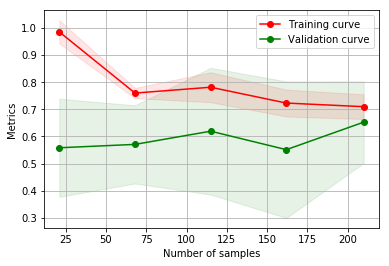

In [60]:
from sklearn.model_selection import learning_curve

plt.figure()
train_sizes, train_scores, test_scores = learning_curve(
    clf, X_train, y_train, cv=cv, scoring='recall', random_state=17)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.xlabel("Number of samples")
plt.ylabel("Metrics")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training curve")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Validation curve")

plt.legend(loc="best")
plt.show()

Our validation curve could converge toward the training curve if more training instances were added. So adding more data is very likely to help here. We have rather high errors for both training and validation curves, which means that our model has high bias (i.e. underfitted). Also we have a high variance around validation curve.

### Part 11. Prediction for test or hold-out samples

We constructed the train and test dataset in part 8. Here we train our model on the train dataset and get our recall score. 

In [61]:
y_pred = clf.predict(X_test)
recall_score(y_test, y_pred)

0.6

It is a bit lower than the cross-validation score, which is about 0.65 as shown in the picture from the previous part. But this is understandable, as we show to the model new data.

### Part 12. Conclusions

We designed a model with recall score = 0.6 which means that it is able to find roughly 60% of good speed daters in the data. Although it is better than nothing, there is plenty room for improvement here. First, it would be much better if we had more data. Second, we might do a better job on feature engineering, find some feature correlations and take a more complicated model. The task was difficult as there were no features that correlate much with the target, and it is hard to separate those classes. For that we might try some dimensionality reduction algorithms. 

As for now, we have a simple model for you to predict will you be a successful speed dater or not. It's advantage is that it has nice interpretation. It says that the less you care about your partner's race, the less you love watchin TV, the less you care about interests sharing and the less you expect your partner to care about it the more success you might get in speed dating. Be tolerant and watch less TV!